In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os
import cv2
import sys
import math
from pathlib import Path
PIPELINE_ROOT = Path('./').resolve().parent.parent.parent
sys.path.append(PIPELINE_ROOT.as_posix())
print(PIPELINE_ROOT)

from src.library.utilities.utilities_process import read_image, write_image

/home/eddyod/programming/pipeline


In [2]:
def show_image(img, increaser=1, _title="", fsize=[15,15]):
    plt.figure(figsize=[15,15])
    plt.imshow(img * increaser, cmap="gray")
    plt.title(_title,fontsize=20)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.show()

def collect_positives(uimg):
    img=np.copy(uimg)
    positives=[]
    radius = 80
    a=int(radius/2)
    color = (65000)
    min_row,min_col = startr, startc
    for index,r in df.iterrows():
        col = int(round(r['x'])-min_col)
        row = int(round(r['y'])-min_row)
        if (col<0) or (col>tile_width) or (row<0) or (row>tile_height):
            continue
        img=cv2.circle(img, (int(col), int(row)), radius, color, 20)
        I=uimg[row-a:row+a,col-a:col+a]
        if I.shape==(radius,radius):
            positives.append((col,row,I))

    return img,positives

In [47]:
animal = 'DK40'
section = 182
channel = 1
prep_path = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'

In [48]:
tif = str(section).zfill(3) + ".tif"
filepath = os.path.join(prep_path, f'C{channel}/full_aligned', tif)
full_img = read_image(filepath)
full_img.shape

(32500, 56500)

In [49]:
dfpath = os.path.join(prep_path, 'cell_labels', 'all_predictions.csv')
df = pd.read_csv(dfpath)

print(len(df.index))
aggregated_data = df.groupby(['section']).agg(
    section_count=('section', 'count')
)

print(aggregated_data.sort_values('section_count').tail())

10
         section_count
section               
182                 10


In [50]:
df = df.loc[df['section'] == section]
df.head()

,x,y,section
0,41813.0,21327.0,182
1,42933.0,21726.0,182
2,40032.0,22820.0,182
3,36889.0,22849.0,182
4,41752.0,22985.0,182


In [51]:
count = len(df.index)
print(count)

10


In [52]:
startc = int(round(min(df['x']), -3))
startr = int(round(min(df['y']), -3))
endc = math.ceil(max(df['x']))
endr = math.ceil(max(df['y']))
# manually set to ROI
#startr = 20000
#endr = startr + 5000
#startc = 30000
#endc = startc + 10000
print(startr, endr, startc, endc)

21000 24192 37000 49000


In [53]:
tile_width = endc - startc
tile_height = endr - startr
img = full_img[startr:endr, startc:endc]
print(f'{startr}:{endr}, {startc}:{endc}')
print(img.shape)
#img.shape # (6800, 30000)

21000:24192, 37000:49000
(3192, 12000)


In [54]:
annotated_img, positives = collect_positives(img)
print(len(positives))

7


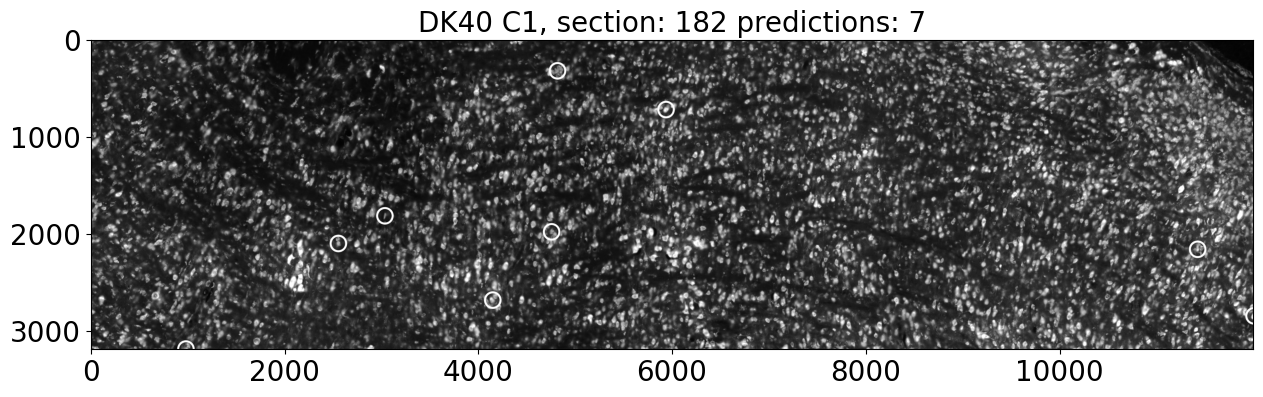

In [55]:
#vimg=annotated_img[in_row_min:in_row_max, in_col_min: in_col_max]
increaser = 1
show_image(annotated_img, increaser=increaser,_title=f'{animal} C{channel}, section: {section} predictions: {len(positives)}')

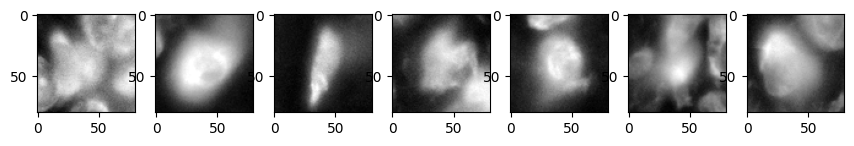

In [56]:
plt.figure(figsize=[15,15])
end = min(100, len(positives))
for i in range(len(positives[0:end])):
    plt.subplot(10,10,i+1)
    plt.imshow(positives[i][2], cmap="gray")
plt.show()

(38304,)
(38304,)


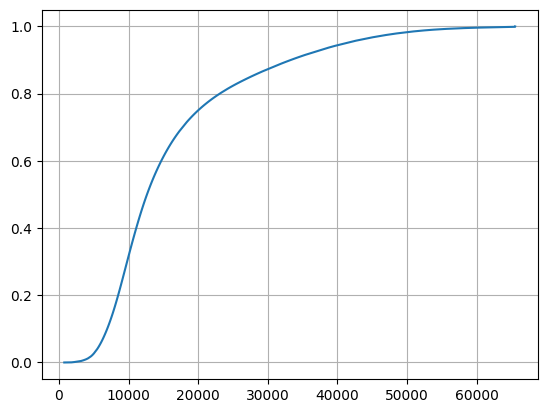

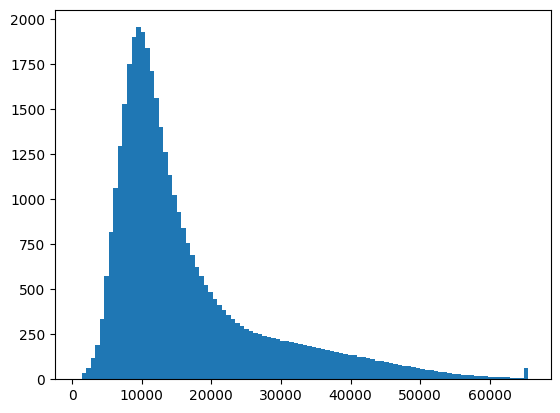

In [57]:
def plot_dist(uimg):
    H=uimg.flatten()
    H=np.sort(H)

    H=H[0:-1:1000]
    print(H.shape)
    H1 = np.arange(0,1,1./H.shape[0])
    H1 = H1[:H.shape[0]]
    print(H1.shape)

    plt.plot(H, H1)
    plt.grid()
    plt.figure()
    plt.hist(H,bins=100);
plot_dist(img)

In [58]:
for i in [10,20,30,40]:
    plt.hist(positives[i][2].flatten(),bins=100);

IndexError: list index out of range

In [15]:
for i in range(len(positives)):
    _shape=positives[i][2].shape
    if _shape !=(80,80):
        print(i,_shape)

S.shape (7, 80, 80)
Mean.shape (80, 80)


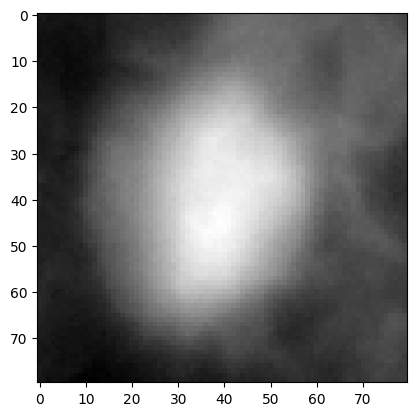

before: mean=26583.06 std=8924.03
after: mean=-0.00 std= 1.00
-rw-r--r-- 1 eddyod eddyod 51362 Feb 19 17:17 mean.pkl


In [59]:
S=np.stack([I for (x,y,I)in positives])
print('S.shape', S.shape)

Mean=np.mean(S,axis=0)
print('Mean.shape', Mean.shape)

plt.imshow(Mean, cmap="gray")
plt.show()

_mean=np.mean(Mean.flatten())
_std=np.std(Mean.flatten())
print('before: mean=%5.2f std=%5.2f'%(_mean,_std))

Mean = (Mean-_mean)/_std

_mean=np.mean(Mean.flatten())
_std=np.std(Mean.flatten())
print('after: mean=%5.2f std=%5.2f'%(_mean,_std))

import pickle as pk
with open('mean.pkl','wb') as pkl_file:
    pk.dump({'Mean':Mean},pkl_file)

!ls -l *.pkl